In [ ]:
# Importamos todas las librerías necesarias al inicio
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.optimize as sco
import cvxpy as cp
import datetime

# Definir las acciones que queremos analizar
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'BRK-B', 'JPM', 'V']

# Descargar datos de precios ajustados al cierre de las acciones seleccionadas
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime.now()
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Mostrar las primeras filas del dataset
print(data.head())


[*********************100%***********************]  10 of 10 completed


Ticker                           AAPL       AMZN       BRK-B      GOOGL  \
Date                                                                      
2023-01-03 00:00:00+00:00  123.904625  85.820000  309.910004  88.899872   
2023-01-04 00:00:00+00:00  125.182610  85.139999  314.549988  87.862434   
2023-01-05 00:00:00+00:00  123.855095  83.120003  312.899994  85.987083   
2023-01-06 00:00:00+00:00  128.412231  86.080002  318.690002  87.124260   
2023-01-09 00:00:00+00:00  128.937271  87.360001  315.529999  87.802582   

Ticker                            JPM        META        MSFT       NVDA  \
Date                                                                       
2023-01-03 00:00:00+00:00  128.934067  124.365555  236.183533  14.305582   
2023-01-04 00:00:00+00:00  130.136368  126.987656  225.852097  14.739296   
2023-01-05 00:00:00+00:00  130.107559  126.558952  219.158371  14.255613   
2023-01-06 00:00:00+00:00  132.597229  129.629700  221.741211  14.849224   
2023-01-09 00:00:0

In [ ]:
# Eliminar cualquier fila con valores nulos
data.dropna(inplace=True)

# Calcular los rendimientos diarios (logarítmicos o simples)
returns = data.pct_change().dropna()

# Mostrar las primeras filas de los retornos calculados
print(returns.head())


Ticker                         AAPL      AMZN     BRK-B     GOOGL       JPM  \
Date                                                                          
2023-01-04 00:00:00+00:00  0.010314 -0.007924  0.014972 -0.011670  0.009325   
2023-01-05 00:00:00+00:00 -0.010605 -0.023726 -0.005246 -0.021344 -0.000221   
2023-01-06 00:00:00+00:00  0.036794  0.035611  0.018504  0.013225  0.019135   
2023-01-09 00:00:00+00:00  0.004089  0.014870 -0.009916  0.007786 -0.004132   
2023-01-10 00:00:00+00:00  0.004457  0.028732  0.002599  0.004544  0.008954   

Ticker                         META      MSFT      NVDA      TSLA         V  
Date                                                                         
2023-01-04 00:00:00+00:00  0.021084 -0.043743  0.030318  0.051249  0.025170  
2023-01-05 00:00:00+00:00 -0.003376 -0.029638 -0.032816 -0.029039 -0.007055  
2023-01-06 00:00:00+00:00  0.024263  0.011785  0.041640  0.024651  0.031453  
2023-01-09 00:00:00+00:00 -0.004230  0.009736  0.051753 

In [ ]:

# Definir el horizonte de predicción (por ejemplo, predecir 1 día en el futuro)
future_horizon = 1

# Crear las características (X) y la variable objetivo (y)
X = returns[:-future_horizon]  # Usamos todos los retornos menos el último día
y = returns.shift(-future_horizon).dropna()  # El objetivo es predecir el siguiente retorno

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar los resultados de las primeras predicciones
print("Predicciones:", y_pred[:5])
print("Valores Reales:", y_test[:5].values)


Predicciones: [[ 0.00476196 -0.00143675 -0.00015292  0.0037331   0.00197926  0.00421269
   0.00317962  0.01313118 -0.00074908  0.000226  ]
 [ 0.00341692  0.0021554   0.00181515  0.00268275  0.00110209  0.00453843
   0.0025925   0.00340289  0.00084845  0.00135347]
 [ 0.00211797 -0.00207706 -0.00078449 -0.00155101  0.00154059 -0.00020491
  -0.00079387  0.00508571  0.00015695  0.00017674]
 [ 0.0028881   0.00551646  0.0028089   0.00432756  0.00153912  0.00697857
   0.00339678  0.00744872  0.00096364  0.00153678]
 [ 0.00189093  0.00481354  0.00186272  0.0016963   0.00188777  0.00269376
   0.00382385  0.01349014  0.00721953  0.00170499]]
Valores Reales: [[-0.00701501 -0.03653943 -0.01182999 -0.04019337 -0.02375591 -0.03209767
  -0.01638141 -0.04085438 -0.08445932  0.00269184]
 [-0.00943566 -0.03427172 -0.00524457 -0.02000571 -0.02174381 -0.02462523
  -0.02253592 -0.02962061 -0.0115657  -0.0136193 ]
 [-0.01999215 -0.01700219 -0.00987909 -0.03115031 -0.00423    -0.01770085
  -0.02397687 -0.029

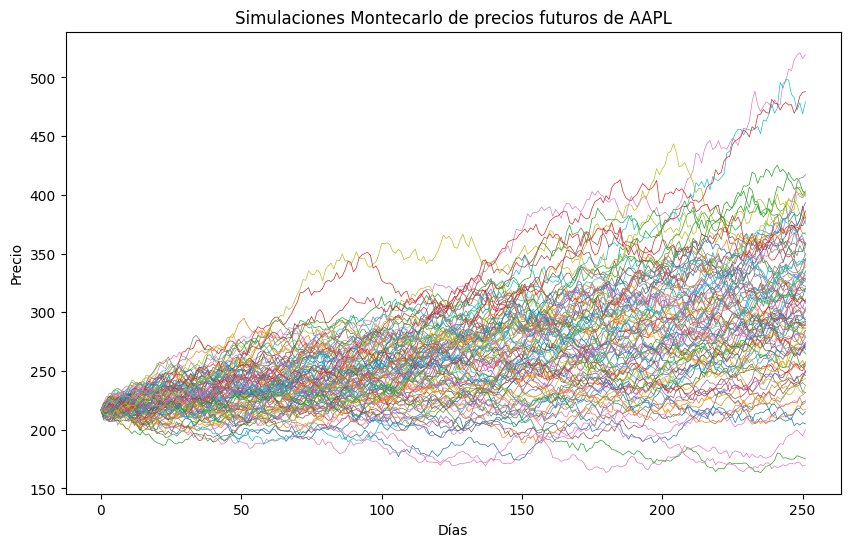

In [ ]:
# Parámetros para la simulación de Montecarlo
num_simulations = 10000  # Número de simulaciones
num_days = 252  # Número de días para simular (1 año)
initial_prices = data.iloc[-1].values  # Últimos precios ajustados de cada acción

# Crear matrices para almacenar los resultados de las simulaciones
simulation_results = np.zeros((num_simulations, num_days, len(tickers)))

# Calcular las estadísticas clave de los retornos históricos
mean_returns = returns.mean().values
std_dev_returns = returns.std().values

# Realizar la simulación de Montecarlo
for i in range(num_simulations):
    # Inicializar los precios simulados con los precios actuales
    simulated_prices = np.zeros((num_days, len(tickers)))
    simulated_prices[0] = initial_prices

    # Generar los precios simulados día a día
    for j in range(1, num_days):
        # Generar cambios porcentuales aleatorios basados en la media y desviación estándar de los retornos
        random_returns = np.random.normal(mean_returns, std_dev_returns)
        simulated_prices[j] = simulated_prices[j-1] * (1 + random_returns)

    # Almacenar los precios simulados para esta simulación
    simulation_results[i] = simulated_prices

# Visualizar algunas simulaciones de Montecarlo para una de las acciones (por ejemplo, AAPL)
plt.figure(figsize=(10, 6))
plt.plot(simulation_results[:100, :, tickers.index('AAPL')].T, lw=0.5)
plt.title('Simulaciones Montecarlo de precios futuros de AAPL')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.show()


In [ ]:
# Markowitz
data.head()

Ticker,AAPL,AMZN,BRK-B,GOOGL,JPM,META,MSFT,NVDA,TSLA,V
Date,,,,,,,,,,
2023-01-03 00:00:00+00:00,123.904625,85.820000,309.910004,88.899872,128.934067,124.365555,236.183533,14.305582,108.099998,204.583481
2023-01-04 00:00:00+00:00,125.182610,85.139999,314.549988,87.862434,130.136368,126.987656,225.852097,14.739296,113.639999,209.732864
2023-01-05 00:00:00+00:00,123.855095,83.120003,312.899994,85.987083,130.107559,126.558952,219.158371,14.255613,110.339996,208.253159
2023-01-06 00:00:00+00:00,128.412231,86.080002,318.690002,87.124260,132.597229,129.629700,221.741211,14.849224,113.059998,214.803299
2023-01-09 00:00:00+00:00,128.937271,87.360001,315.529999,87.802582,132.049301,129.081345,223.900162,15.617717,119.769997,215.641800


In [ ]:

# Calcular los rendimientos anuales esperados y la matriz de covarianza
annual_expected_returns = (1 + daily_returns.mean())**252 - 1
covariance_matrix = daily_returns.cov() * 252
annual_expected_returns

covariance_matrix.head()

Ticker,AAPL,AMZN,BRK-B,GOOGL,JPM,META,MSFT,NVDA,TSLA,V
Ticker,,,,,,,,,,
AAPL,0.047480,0.026596,0.008668,0.029671,0.007145,0.032541,0.025065,0.040694,0.050325,0.012442
AMZN,0.026596,0.096354,0.009076,0.052944,0.009459,0.072108,0.043678,0.067159,0.059250,0.014137
BRK-B,0.008668,0.009076,0.018925,0.010493,0.016602,0.012594,0.006832,0.006751,0.012012,0.010287
GOOGL,0.029671,0.052944,0.010493,0.087001,0.008746,0.060133,0.037267,0.058467,0.045628,0.012684
JPM,0.007145,0.009459,0.016602,0.008746,0.043238,0.012726,0.004483,0.017399,0.027144,0.011792


In [ ]:
# Generar un gran número de portafolios aleatorios
num_portfolios = 100000 # numero de portafolios
weights_arr = np.zeros((num_portfolios, len(symbols)))
returns_arr = np.zeros(num_portfolios)
volatility_arr = np.zeros(num_portfolios)

weights = np.random.random(len(symbols))
print(weights)
print(weights / np.sum(weights))

[0.22049835 0.93257488 0.41196848 0.60028041 0.9509984  0.61140009
 0.82581012 0.65891702 0.91369433 0.65847026]
[0.03249977 0.13745441 0.06072101 0.08847674 0.1401699  0.0901157
 0.1217181  0.09711933 0.13467156 0.09705348]


In [ ]:
for i in range(num_portfolios):
    # Generar pesos aleatorios y normalizarlos para que sumen 1
    weights = np.random.random(len(symbols))
    weights = weights / np.sum(weights)

    # Calcular el rendimiento y la volatilidad esperados del portafolio
    portfolio_return = np.dot(weights, annual_expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

    # Almacenar los resultados en los arrays correspondientes
    weights_arr[i, :] = weights #pesos generados del port. i
    returns_arr[i] = portfolio_return #rendimientos generados port. i
    volatility_arr[i] = portfolio_volatility #volatilidad gen. port. i

# Crear un DataFrame con los resultados de los portafolios
portfolios = pd.DataFrame({'Volatility': volatility_arr, 'Return': returns_arr})
for i, symbol in enumerate(symbols):
    portfolios[symbol + ' Weight'] = weights_arr[:, i]
portfolios.head()

,Volatility,Return,AAPL Weight,MSFT Weight,GOOGL Weight,AMZN Weight,TSLA Weight,META Weight,NVDA Weight,BRK-B Weight,JPM Weight,V Weight
0,0.186479,0.640852,0.212643,0.099723,0.038562,0.100520,0.241570,0.073388,0.096715,0.034138,0.102171,0.000569
1,0.191134,0.804648,0.025198,0.120737,0.106348,0.166371,0.160022,0.151002,0.026672,0.083104,0.039660,0.120886
2,0.184355,0.779719,0.108699,0.077170,0.106255,0.085544,0.150044,0.149167,0.082209,0.074262,0.059668,0.106982
3,0.184145,0.554940,0.090004,0.157602,0.121444,0.124502,0.176240,0.027249,0.136077,0.016221,0.121982,0.028679
4,0.207698,0.921703,0.222959,0.135803,0.073431,0.060390,0.009562,0.027950,0.005976,0.180385,0.082257,0.201287


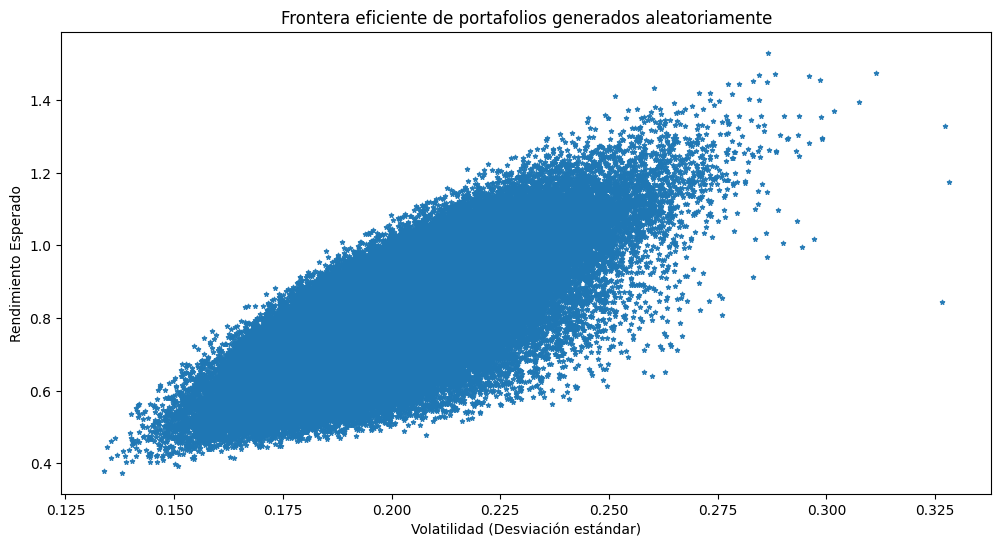

In [ ]:
# Graficar la frontera eficiente de los portafolios generados
plt.figure(figsize=(12, 6))
plt.scatter(portfolios['Volatility'], portfolios['Return'], marker='*', s=10, alpha=0.9)

plt.xlabel('Volatilidad (Desviación estándar)')
plt.ylabel('Rendimiento Esperado')
plt.title('Frontera eficiente de portafolios generados aleatoriamente')
plt.grid(False)
plt.show()

[*********************100%***********************]  1 of 1 completed
<ipython-input-85-cd49762ac97b>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return_rebalanced = portfolio_growth_rebalanced[-1] - 1


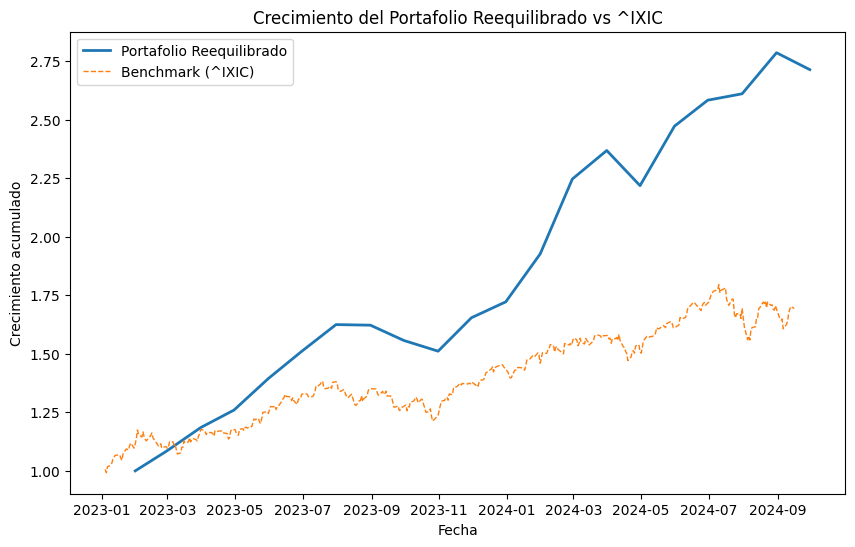

Retorno acumulado del portafolio reequilibrado: 171.38%
Retorno anualizado del portafolio reequilibrado: 63.45%
Volatilidad anualizada del portafolio reequilibrado: 21.04%
Sharpe Ratio del portafolio reequilibrado: 2.97
Retorno acumulado del ^IXIC: 69.37%
Retorno anualizado del ^IXIC: 32.72%
Volatilidad anualizada del ^IXIC: 17.92%
Sharpe Ratio del ^IXIC: 1.77


<ipython-input-85-cd49762ac97b>:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return_benchmark = benchmark_growth[-1] - 1


In [ ]:

# Parámetros ajustables
reebalancing_period = 'M'  # Cambiar a 'D' para diario, 'Q' para trimestral, 'Y' para anual
risk_free_rate = 0.01  # Ajustar la tasa libre de riesgo
benchmark_ticker = '^IXIC'  # Por ejemplo, Nasdaq Composite en lugar de S&P 500
start_date = '2023-01-01'  # Ajustar la fecha de inicio del backtest
end_date = '2024-09-17'  # Ajustar la fecha de fin del backtest

# Descargar los datos históricos del benchmark
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)['Adj Close']
benchmark_returns = benchmark_data.pct_change().dropna()

# Calcular el crecimiento acumulado del benchmark
initial_investment = 1
benchmark_growth = (1 + benchmark_returns).cumprod() * initial_investment

# Reequilibrar el portafolio en función de un periodo ajustable
monthly_returns = returns.resample(reebalancing_period).apply(lambda x: (1 + x).prod() - 1)

# Aplicar el reequilibrio al portafolio
portfolio_growth_rebalanced = pd.Series(index=monthly_returns.index)
capital = initial_investment

for i in range(len(monthly_returns)):
    if i == 0:
        portfolio_growth_rebalanced.iloc[i] = capital
    else:
        # Reequilibrar con las ponderaciones óptimas cada mes, trimestre o periodo ajustado
        capital *= (1 + monthly_returns.iloc[i].dot(optimal_weights))
        portfolio_growth_rebalanced.iloc[i] = capital

# Calcular las estadísticas del rendimiento del portafolio reequilibrado
rebalanced_returns = portfolio_growth_rebalanced.pct_change().dropna()
cumulative_return_rebalanced = portfolio_growth_rebalanced[-1] - 1
annualized_return_rebalanced = rebalanced_returns.mean() * 12  # Cambiar a 252 para diario, 4 para trimestral
annualized_volatility_rebalanced = rebalanced_returns.std() * np.sqrt(12)  # Ajustar según la frecuencia
sharpe_ratio_rebalanced = (annualized_return_rebalanced - risk_free_rate) / annualized_volatility_rebalanced

# Visualizar el crecimiento del portafolio optimizado reequilibrado vs benchmark
plt.figure(figsize=(10, 6))
plt.plot(portfolio_growth_rebalanced, label='Portafolio Reequilibrado', lw=2)
plt.plot(benchmark_growth, label=f'Benchmark ({benchmark_ticker})', lw=1, linestyle='--')
plt.title(f'Crecimiento del Portafolio Reequilibrado vs {benchmark_ticker}')
plt.xlabel('Fecha')
plt.ylabel('Crecimiento acumulado')
plt.legend()
plt.show()

# Mostrar estadísticas de rendimiento del portafolio reequilibrado
print(f'Retorno acumulado del portafolio reequilibrado: {cumulative_return_rebalanced:.2%}')
print(f'Retorno anualizado del portafolio reequilibrado: {annualized_return_rebalanced:.2%}')
print(f'Volatilidad anualizada del portafolio reequilibrado: {annualized_volatility_rebalanced:.2%}')
print(f'Sharpe Ratio del portafolio reequilibrado: {sharpe_ratio_rebalanced:.2f}')

# Mostrar estadísticas del benchmark
cumulative_return_benchmark = benchmark_growth[-1] - 1
annualized_return_benchmark = benchmark_returns.mean() * 252
annualized_volatility_benchmark = benchmark_returns.std() * np.sqrt(252)
sharpe_ratio_benchmark = (annualized_return_benchmark - risk_free_rate) / annualized_volatility_benchmark

print(f'Retorno acumulado del {benchmark_ticker}: {cumulative_return_benchmark:.2%}')
print(f'Retorno anualizado del {benchmark_ticker}: {annualized_return_benchmark:.2%}')
print(f'Volatilidad anualizada del {benchmark_ticker}: {annualized_volatility_benchmark:.2%}')
print(f'Sharpe Ratio del {benchmark_ticker}: {sharpe_ratio_benchmark:.2f}')



Ponderaciones óptimas basadas en Optimización Lineal:
AAPL: 0.00%
MSFT: 20.00%
GOOGL: 0.00%
AMZN: 20.00%
TSLA: 0.00%
META: 20.00%
NVDA: 0.00%
BRK-B: 20.00%
JPM: 20.00%
V: 0.00%


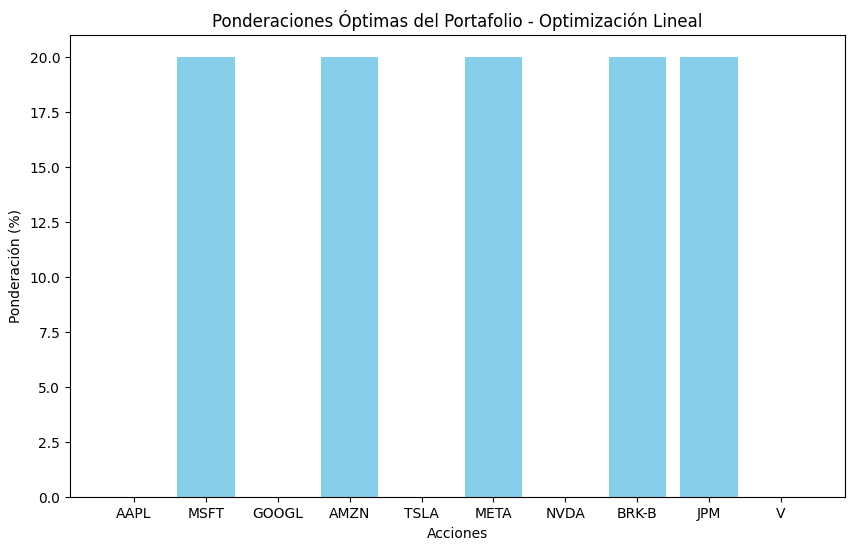

In [ ]:


# Paso 2: Preprocesamiento de los Datos
data.dropna(inplace=True)


# Paso 3: Calcular Rendimientos Esperados
# Convertir los rendimientos esperados a un vector numpy
mean_returns = returns.mean() * 252  # Rendimientos anualizados
mean_returns = mean_returns.values  # Convertir a numpy

# Paso 4: Optimización Lineal
# Definir variables de decisión
n_assets = len(tickers)
weights = cp.Variable(n_assets)

# Definir la función objetivo: maximizar el rendimiento esperado del portafolio
objective = cp.Maximize(mean_returns @ weights)

# Definir las restricciones
constraints = [
    cp.sum(weights) == 1,    # La suma de las ponderaciones debe ser 1
    weights >= 0,             # Sin posiciones cortas
    weights <= 0.20            # Limitar a máximo 20% por activo (opcional)
]

# Definir y resolver el problema
problem = cp.Problem(objective, constraints)
problem.solve()

# Obtener las ponderaciones óptimas
optimal_weights_linear = weights.value

# Paso 5: Mostrar Resultados
print("\nPonderaciones óptimas basadas en Optimización Lineal:")
for ticker, weight in zip(tickers, optimal_weights_linear):
    print(f'{ticker}: {weight * 100:.2f}%')

# Opcional: Visualizar las ponderaciones
plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights_linear * 100, color='skyblue')
plt.xlabel('Acciones')
plt.ylabel('Ponderación (%)')
plt.title('Ponderaciones Óptimas del Portafolio - Optimización Lineal')
plt.show()
